In [2]:
import os
from tqdm import tqdm
from PIL import Image
from skimage.transform import resize

import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import pickle

In [3]:
img_path = 'D:/cube_resized/86/'
lbl_path = 'D:/cube_labels/86/'

str_path = next(os.walk(img_path))[1]

cnt = 0
files = []
for i in str_path:
    for j in next(os.walk(lbl_path + i))[2]:
        files.append(i + '/' + j[1:])
        cnt += 1

low_image = np.zeros((cnt,256,256,3))
low_label = np.zeros((cnt,256,256))

for n, strength in enumerate(str_path):
    image_paths = img_path + strength + '/'
    label_paths = lbl_path + strength + '/'
    ep = len(next(os.walk(label_paths))[2])
    for i, lbl in enumerate(next(os.walk(label_paths))[2]):
        
        img = lbl[1:]
        
        image = plt.imread(image_paths + img)
        low_image[n*ep + i] = image[:,:,:3]
        
        label = plt.imread(label_paths + lbl)
        if label.ndim == 3:
            low_label[n*ep + i] = label[:,:,:1].reshape(256,256)
        else:
            low_label[n*ep + i] = label

In [4]:
len(next(os.walk(label_paths))[2])

20

In [5]:
low_label.shape

(60, 256, 256)

In [23]:
porosity = []
for i in range(low_label.shape[0]):
    cnt = 0
    for j in range(low_label.shape[1]):
        for k in range(low_label.shape[2]):
            if low_label[i][j][k] >= 0.5:
                cnt += 1
    porosity.append(cnt/(256*256)*100)
    
porosity

[13.165283203125,
 12.28790283203125,
 12.933349609375,
 12.884521484375,
 9.08660888671875,
 9.70458984375,
 17.1630859375,
 12.01019287109375,
 19.59991455078125,
 7.952880859375,
 7.17620849609375,
 10.2081298828125,
 6.01959228515625,
 7.0709228515625,
 14.0289306640625,
 10.35919189453125,
 13.299560546875,
 10.49957275390625,
 12.12158203125,
 10.14556884765625,
 5.517578125,
 3.45306396484375,
 2.655029296875,
 2.14691162109375,
 4.620361328125,
 5.80902099609375,
 4.13665771484375,
 3.52935791015625,
 2.25372314453125,
 1.4739990234375,
 2.35137939453125,
 2.8564453125,
 2.42767333984375,
 3.363037109375,
 1.82342529296875,
 2.655029296875,
 4.33807373046875,
 5.27496337890625,
 3.936767578125,
 7.67364501953125,
 2.4261474609375,
 1.9256591796875,
 2.38494873046875,
 2.01416015625,
 1.8524169921875,
 2.04010009765625,
 2.020263671875,
 3.7841796875,
 1.78070068359375,
 2.49786376953125,
 1.61590576171875,
 1.17950439453125,
 2.984619140625,
 2.39410400390625,
 1.385498046875,


Text(0.5, 1.0, 'Masking')

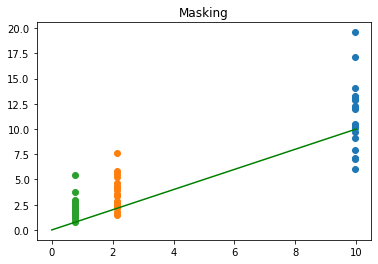

In [31]:
plt.scatter([9.97 for i in range(20)],porosity[0:20])
plt.scatter([2.13 for i in range(20)],porosity[20:40])
plt.scatter([0.77 for i in range(20)],porosity[40:60])

# y=x 직선 그리기
t = np.arange(0,11)
plt.plot(t,t,'g-')
plt.title('Masking')

In [28]:
np.average(porosity[0:20])

11.385879516601562

In [29]:
np.average(porosity[20:40])

3.61480712890625

In [30]:
np.average(porosity[40:60])

2.1883392333984375

In [15]:
len(low_label[1][2])

256

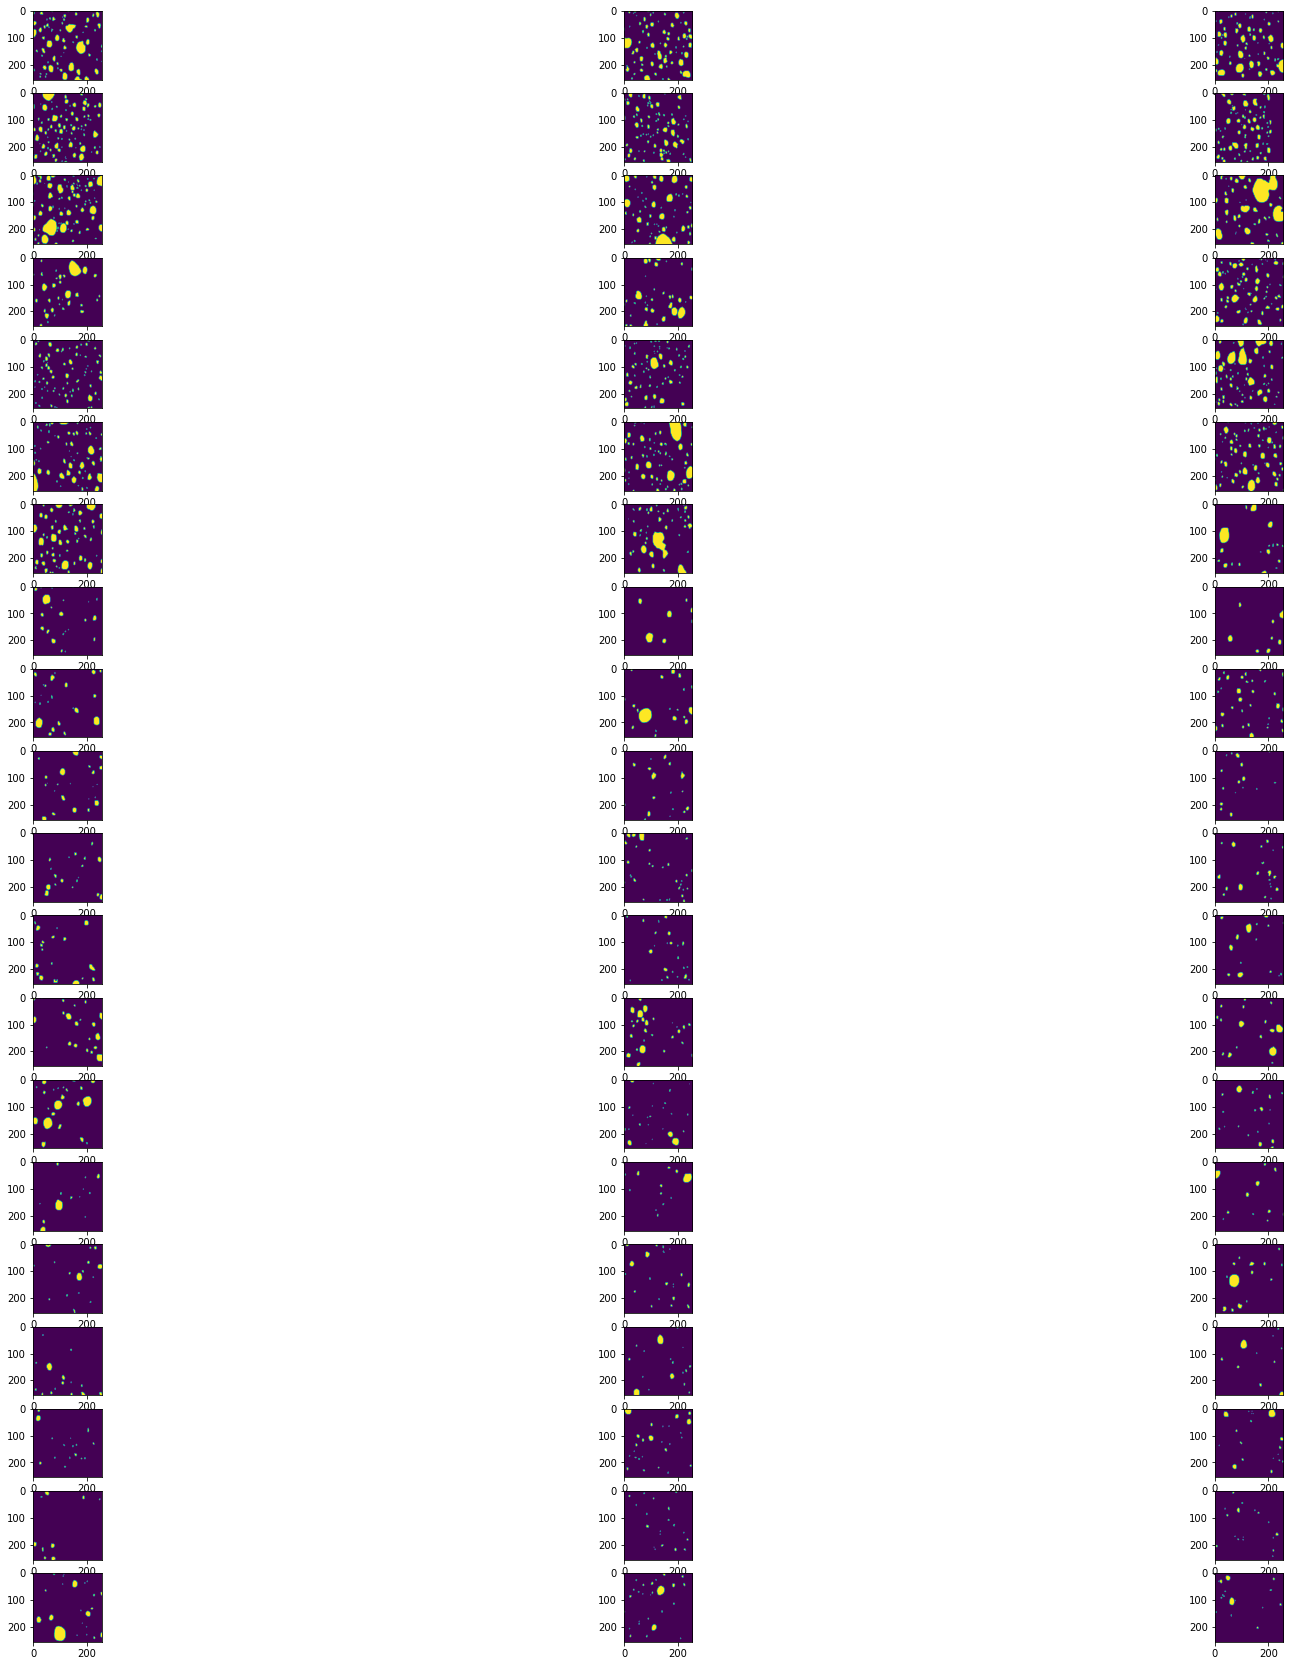

In [30]:
plt.figure(figsize=(30,30))
for i in range(60):
    plt.subplot(20, 3, i+1)
    plt.imshow(low_label[i])

In [21]:
str_path

['24', '35', '50']